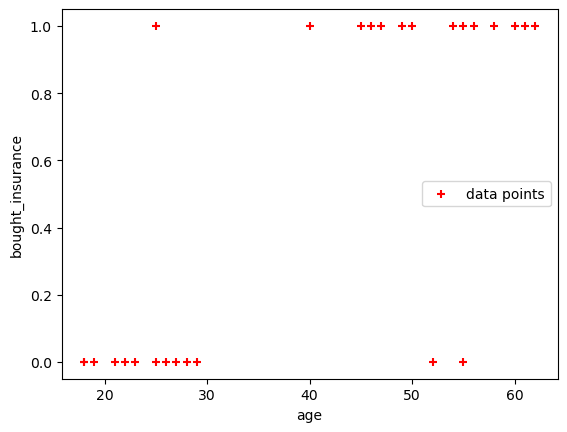

array([1, 0, 1], dtype=int64)

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load the dataset
df = pd.read_csv("insurance_data.csv")

# Plotting the data
plt.scatter(df["age"], df["bought_insurance"], marker="+", color="red", label="data points")
plt.legend()
plt.xlabel("age")
plt.ylabel("bought_insurance")
plt.show()

# Preparing the data
X = df["age"].values.reshape(-1, 1)
y = df["bought_insurance"].values

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Training the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_test)

# Display predictions
predictions


In [36]:
score = model.score(X_test, y_test)
score

1.0

In [37]:
model.predict_proba(X_test)

array([[0.04794221, 0.95205779],
       [0.77002443, 0.22997557],
       [0.0540927 , 0.9459073 ]])

In [38]:
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
model_params = {
    "LinearRegression":{
        "model":LinearRegression(),
        "params":{}
    },
    "LogisticRegression":{
        "model":LogisticRegression(),
        "params":{
            "solver": ["liblinear", "saga", "sag", "lbfgs", "newton-cg"],
            "C":[i / 10 for i in range(1, 10, 3)],
            "tol":[i / 10 for i in range(1, 10, 3)]
        }
    },
    "RandomForestClassifier":{
        "model":RandomForestClassifier(),
        "params":{
            "n_estimators":[i for i in range(1, 100, 10)],
            "criterion": ["gini", "entropy"], 
            "random_state": [i for i in range(1, 100, 25)]
        }
    },
    "LassoRegression":{
        "model":Lasso(max_iter = 1000000),
        "params":{
            "alpha":[i for i in range(1, 50, 5)],
            "tol":[i / 10 for i in range(1, 10, 4)]
        }
    }
}
score = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp["model"], mp["params"], cv = 5, return_train_score = False)
    if model_name == "LogisticRegression":
        clf.fit(X, y)
    else:
        clf.fit(X, df.bought_insurance)
    score.append({"model_name":[model_name], "best score": [clf.best_score_], "best params": [clf.best_params_]})


In [39]:
score

[{'model_name': ['LinearRegression'],
  'best score': [0.3973434570478192],
  'best params': [{}]},
 {'model_name': ['LogisticRegression'],
  'best score': [0.8533333333333335],
  'best params': [{'C': 0.1, 'solver': 'lbfgs', 'tol': 0.1}]},
 {'model_name': ['RandomForestClassifier'],
  'best score': [0.8866666666666667],
  'best params': [{'criterion': 'gini',
    'n_estimators': 1,
    'random_state': 51}]},
 {'model_name': ['LassoRegression'],
  'best score': [0.3661035746433032],
  'best params': [{'alpha': 1, 'tol': 0.1}]}]

In [42]:
df = pd.DataFrame(clf.cv_results_)
df.tail(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
27,0.000000,0.000000,0.001304,0.002608,46,0.1,"{'alpha': 46, 'tol': 0.1}",-0.002268,-0.002268,-0.041667,-0.955062,-0.745868,-0.349426,0.41466,7
28,0.001605,0.003209,0.000000,0.000000,46,0.5,"{'alpha': 46, 'tol': 0.5}",-0.002268,-0.002268,-0.041667,-0.955062,-0.745868,-0.349426,0.41466,7
29,0.000000,0.000000,0.000000,0.000000,46,0.9,"{'alpha': 46, 'tol': 0.9}",-0.002268,-0.002268,-0.041667,-0.955062,-0.745868,-0.349426,0.41466,7
